In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import warnings


In [2]:
# f = open("spambase.names", 'r')
# count = 0
# column_names = []
# for line in f:
#     count = count+1
#     if count >=34:
#         temp = line.split(":")
#         column_names.append(temp[0])
# print(len(column_names))  

# Problem 1

## 1a

In [3]:
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 
 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 
 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 
 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 
 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 
 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table',
 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 
 'capital_run_length_longest', 'capital_run_length_total', 'class']
org_data = pd.read_csv("spambase.data",names = column_names)
#org_data.iloc[:,0:-1]
#org_data

In [4]:
X = org_data.iloc[:,0:-1]
y = org_data[['class']]

In [5]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 57)

In [6]:
# preprocessing
ss_scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(ss_scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(ss_scaler.transform(X_test),columns = X_test.columns)
y_train = np.ravel(y_train)

In [7]:
# check of the proportion of the class after splitting

# y_train.sum(axis = 0, skipna = True)[0]/y_train.shape[0]
# y_test.sum(axis = 0, skipna = True)[0]/y_test.shape[0] 

In [8]:
warnings.filterwarnings("ignore", category=FutureWarning)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


In [9]:
# 1. Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[667  30]
 [ 42 412]]


In [10]:
# 2. True Positives, False Positives, True Negatives, False Negatives
true_negatives = conf_mat[0][0]
false_negatives = conf_mat[1][0]
true_positives = conf_mat[1][1]
false_positives = conf_mat[0][1]
print("True Positives:", true_positives, ", False Positives: ", false_positives, ", True Negatives: ", true_negatives,
     ", False Negatives: ", false_negatives)

True Positives: 412 , False Positives:  30 , True Negatives:  667 , False Negatives:  42


In [11]:
# 3. Accuracy, Error
accuracy = (true_positives + true_negatives)/y_test.shape[0]
error = 1-accuracy
print("Accuracy: ", accuracy, ", Error: ", error)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy:  0.9374456993918332 , Error:  0.0625543006081668


In [12]:
#print("Accuracy on testing set:",metrics.accuracy_score(y_test, y_pred))
print("Precision on testing set:",metrics.precision_score(y_test, y_pred))
print("Recall on testing set:",metrics.recall_score(y_test, y_pred))
print("F1-score on testing set:",metrics.f1_score(y_test,y_pred))

Precision on testing set: 0.9321266968325792
Recall on testing set: 0.9074889867841409
F1-score on testing set: 0.9196428571428571


\pagebreak

## 1b

In [14]:
coeff = pd.DataFrame(log_reg.coef_.T,X_train.columns,columns=['Coefficients'])
print("Intercept:", log_reg.intercept_)
coeff


Intercept: [-2.05031456]


,Coefficients
word_freq_make,-0.128952
word_freq_address,-0.229919
word_freq_all,0.021797
word_freq_3d,0.864687
word_freq_our,0.375941
word_freq_over,0.162546
word_freq_remove,1.072679
word_freq_internet,0.227923
word_freq_order,0.184366
word_freq_mail,0.026171


\pagebreak

In [15]:
coeff["new_coeff"] = abs(coeff["Coefficients"])
coeff = coeff.sort_values(by = 'new_coeff',ascending=False)
coeff = coeff.drop('new_coeff',axis =1)
print("The features that contribute mostly to the prediction are given below:")
coeff.head(n=10)


The features that contribute mostly to the prediction are given below:


,Coefficients
word_freq_george,-3.708191
word_freq_hp,-2.060978
word_freq_cs,-1.563493
word_freq_000,1.528238
word_freq_meeting,-1.479615
capital_run_length_average,1.377071
word_freq_415,-1.268668
capital_run_length_longest,1.160721
char_freq_$,1.091596
word_freq_remove,1.072679


In [16]:
#coeff = pd.DataFrame(log_reg.coef_.T,X_train.columns,columns=['Coefficients'])
coeff = pd.DataFrame(log_reg.coef_,columns = X_train.columns)
pos_corr = []
neg_corr = []
for i in coeff:
    if coeff[i][0] > 0:
        pos_corr.append(i)
    else:
        neg_corr.append(i)
print("Features positively correlated with spam class: ", pos_corr)
print("\n")
print("Features negatively correlated with spam class: ", neg_corr)

Features positively correlated with spam class:  ['word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_650', 'word_freq_857', 'word_freq_technology', 'char_freq_(', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']


Features negatively correlated with spam class:  ['word_freq_make', 'word_freq_address', 'word_freq_will', 'word_freq_people', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'wor

In [17]:
# log_reg.predict_proba(X_test)

In [18]:
# log_reg.predict(X_test)

\pagebreak

## 1c

In [19]:
y_prob = log_reg.predict_proba(X_test)[::,1]



decision_threshold = [0.25,0.5,0.75,0.9]

for i in decision_threshold:
    y_pred_dt = []
    for j in y_prob:
        if j>=i:
            y_pred_dt.append(1)
        else:
            y_pred_dt.append(0)
    print("Accuracy when decision threshold is ",i,": ",metrics.accuracy_score(y_test, y_pred_dt))
    print("Precision when decision threshold is ",i,": ",metrics.precision_score(y_test, y_pred_dt))
    print("Recall when decision threshold is ",i,": ",metrics.recall_score(y_test, y_pred_dt))
    #print(confusion_matrix(y_test, y_pred_dt))
    print("\n")

Accuracy when decision threshold is  0.25 :  0.9148566463944396
Precision when decision threshold is  0.25 :  0.8503937007874016
Recall when decision threshold is  0.25 :  0.9515418502202643


Accuracy when decision threshold is  0.5 :  0.9374456993918332
Precision when decision threshold is  0.5 :  0.9321266968325792
Recall when decision threshold is  0.5 :  0.9074889867841409


Accuracy when decision threshold is  0.75 :  0.895742832319722
Precision when decision threshold is  0.75 :  0.9441489361702128
Recall when decision threshold is  0.75 :  0.7819383259911894


Accuracy when decision threshold is  0.9 :  0.8479582971329279
Precision when decision threshold is  0.9 :  0.9603960396039604
Recall when decision threshold is  0.9 :  0.6409691629955947




For decision threshold = 0.5, the combination of the values of the accuracy, precision and recall are best, hence the decision threshold = 0.5 is the best choice. Accuracy of the model increases as the threshold increases till threshold=0.5, post which the accuracy decreases. Precision increases as the decision threshold increases as the count of false positives decreases. Recall decreases as the threshold increases as the count of false negatives increases.

\pagebreak

## 1d

In [20]:
X = org_data.iloc[:,0:-1]
y = org_data[['class']]

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 57)

# preprocessing
ss_scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(ss_scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(ss_scaler.transform(X_test),columns = X_test.columns)


In [21]:
# Compute Cost function is implemented to check if the cost is decreasing with iterations
def cross_entropy_obj(X,y,theta):
    N = y.shape[0]
    z = np.dot(X, theta)
    h = sigmoid(z)
#     print("h",h)
#     print("first half", -(np.transpose(y).dot(np.log(h))))
#     print("second half", -(np.transpose(1-y).dot(np.log(1-h))))
    cost = (1/N)*(-(np.transpose(y).dot(np.log(h)))-(np.transpose(1-y).dot(np.log(1-h))))
    return cost

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Method to compute the theta values using gradient descent
def gradient_descent_log_reg(X, y, alpha, num_iters):
    iters = num_iters
    if 'x0' not in X.columns:
        x0 = np.ones((X.shape[0], 1), dtype=int)
        X.insert(0, "x0", x0, True)
    # d is the number of features    
    d = X_train.shape[1]
    # Initializing theta with zeros
    theta = np.zeros((d,1))    
    X=X.values
    y=y.values
    diff_cost = 0
    N = y.shape[0]
    theta_old = theta
    
    #while diff_cost > 0.000001 or num_iters > 0
    
    while num_iters > 0:
        z = np.dot(X, theta_old)
        h = sigmoid(z)
        gradient = np.transpose(X).dot(h-y)
        theta_new = theta_old - alpha * (1/N) * gradient
        #print("theta_new", theta_new)
        # checking for convergence
        delta_theta = theta_new - theta_old
        delta = np.sqrt(np.transpose(delta_theta).dot(delta_theta))
        #print(delta)
        if delta < 0.00001 and iters != num_iters :
            print("Gradient descent converged at iteration", iters-num_iters)
            break
        num_iters = num_iters - 1
        old_cost = cross_entropy_obj(X,y,theta_old)
        theta_old = theta_new
        new_cost = cross_entropy_obj(X,y,theta_new)
        diff_cost = old_cost - new_cost
        #print("old_cost", old_cost)
        #print("new cost", new_cost)
        #print("diffcost:", diff_cost)
    return theta_new


def predict_prob(X,theta):
    if 'x0' not in X.columns:
        x0 = np.ones((X.shape[0], 1), dtype=int)
        X.insert(0, "x0", x0, True)
    return(sigmoid(np.dot(X,theta)))


# predict the y values using theta and X
def predict(y, threshold):
    y_pred_gd=[]
    for i in y:
        if i>=threshold:
            y_pred_gd.append(1)
        else:
            y_pred_gd.append(0)
    return y_pred_gd



In [22]:
# theta = gradient_descent_log_reg(X_train, y_train, 0.3, 10)
# print(cross_entropy_obj(X_train,y_train,theta)[0][0])

In [23]:
lr_rates = [0.01, 0.05, 0.4]
iter_var = [10, 50, 100]

for i in lr_rates:
    for j in iter_var:
        theta = gradient_descent_log_reg(X_train, y_train, i, j)
        print("Cross Entropy for alpha =", i,"and iterations = ", j, "is: ", cross_entropy_obj(X_train,y_train,theta)[0][0])
        if j == 100:
            pred_prob = predict_prob(X_test,theta)
            y_pred_val = predict(pred_prob, 0.5)
            print("Accuracy when decision threshold is",i,"and iter = 100: ",metrics.accuracy_score(y_test, y_pred_val))
            print("F1_score when decision threshold is",i,"and iter = 100: ",metrics.f1_score(y_test, y_pred_val))
            print("\n")
        

Cross Entropy for alpha = 0.01 and iterations =  10 is:  0.6495252510572939
Cross Entropy for alpha = 0.01 and iterations =  50 is:  0.5365732045629628
Cross Entropy for alpha = 0.01 and iterations =  100 is:  0.46158848382339607
Accuracy when decision threshold is 0.01 and iter = 100:  0.8992180712423979
F1_score when decision threshold is 0.01 and iter = 100:  0.8719646799116998


Cross Entropy for alpha = 0.05 and iterations =  10 is:  0.5348795325629325
Cross Entropy for alpha = 0.05 and iterations =  50 is:  0.36599881153810176
Cross Entropy for alpha = 0.05 and iterations =  100 is:  0.3126833535736034
Accuracy when decision threshold is 0.05 and iter = 100:  0.9026933101650738
F1_score when decision threshold is 0.05 and iter = 100:  0.8747203579418344


Cross Entropy for alpha = 0.4 and iterations =  10 is:  0.3232409114693962
Cross Entropy for alpha = 0.4 and iterations =  50 is:  0.2510707094697467
Cross Entropy for alpha = 0.4 and iterations =  100 is:  0.23462056796440348
A

Compared to the metrics given by the package, the accuracy and F1 score obtained is less using my implementation of the logistic regression using gradient descent which might be due to the fact that the gradient descent is still not converged with 100 iterations and the alpha values selected.  

\pagebreak

# Problem 2

## 2a

In [24]:
# removing bias again

# X_train = X_train.iloc[:,1:]
# X_test = X_test.iloc[:,1:]
if X_train.columns[0] == "x0":
    X_train = X_train.iloc[:,1:]
if X_test.columns[0]=="x0":
    X_test = X_test.iloc[:,1:]
y_train = np.ravel(y_train)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,17,2):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    #predictions 
    y_pred_train_knn = classifier.predict(X_train)
    y_pred_test_knn = classifier.predict(X_test)
    print("Accuracy in training data using KNN for k=",i,": ",metrics.accuracy_score(y_train, y_pred_train_knn))
    print("Error in training data using KNN for k=",i,": ",1-metrics.accuracy_score(y_train, y_pred_train_knn))
    print("Accuracy in testing data using KNN for k=",i,": ",metrics.accuracy_score(y_test, y_pred_test_knn))
    print("Error in testing data using KNN for k=",i,": ",1-metrics.accuracy_score(y_test, y_pred_test_knn))
    print("\n")

Accuracy in training data using KNN for k= 1 :  0.9994202898550725
Error in training data using KNN for k= 1 :  0.0005797101449275255
Accuracy in testing data using KNN for k= 1 :  0.9183318853171155
Error in testing data using KNN for k= 1 :  0.08166811468288449


Accuracy in training data using KNN for k= 3 :  0.9504347826086956
Error in training data using KNN for k= 3 :  0.04956521739130437
Accuracy in testing data using KNN for k= 3 :  0.9252823631624674
Error in testing data using KNN for k= 3 :  0.07471763683753263


Accuracy in training data using KNN for k= 5 :  0.9307246376811594
Error in training data using KNN for k= 5 :  0.06927536231884057
Accuracy in testing data using KNN for k= 5 :  0.9235447437011295
Error in testing data using KNN for k= 5 :  0.07645525629887051


Accuracy in training data using KNN for k= 7 :  0.9260869565217391
Error in training data using KNN for k= 7 :  0.07391304347826089
Accuracy in testing data using KNN for k= 7 :  0.9087749782797567
Error in

k=3, gives the highest accuracy in testing.

\pagebreak

## 2b

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

classifiers = ["Logistic Regression", "LDA", "kNN", "Naive Bayes", "Decision Tree"]

def log_reg(X,y):
    log_reg = LogisticRegression()
    log_reg.fit(X,y)
    return log_reg

def knn(X,y):
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X,y)
    return classifier

def LDA(X,y):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X,y)
    return lda

def NB(X,y):
    nb = GaussianNB()
    nb.fit(X,y)
    return nb

def DTClassifier(X,y):
    clf = DecisionTreeClassifier()
    clf.fit(X,y)
    return clf


    
def predict(classifier,X_train,y_train,X_test,y_test):
    if classifier == "Logistic Regression":
        model = log_reg(X_train,y_train)
    elif classifier == "kNN":
        model = knn(X_train, y_train)
    elif classifier == "LDA" :
        model = LDA(X_train, y_train)
    elif classifier == "Naive Bayes":
        model = NB(X_train, y_train)
    elif classifier == "Decision Tree":
        model = DTClassifier(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print("Accuracy in training set using",classifier,":",metrics.accuracy_score(y_train, y_pred_train))
    print("Error in training set using",classifier,":",1 - metrics.accuracy_score(y_train, y_pred_train))
    print("Accuracy in testing set using",classifier,":",metrics.accuracy_score(y_test, y_pred_test))
    print("Error in testing set using",classifier,":",1 - metrics.accuracy_score(y_test, y_pred_test))
    print("Precision in testing set using",classifier,":",metrics.precision_score(y_test, y_pred_test))
    print("Recall in testing set using",classifier,":",metrics.recall_score(y_test, y_pred_test))
    print("\n") 
    
for i in classifiers:
    predict(i,X_train,y_train,X_test,y_test)

Accuracy in training set using Logistic Regression : 0.9318840579710145
Error in training set using Logistic Regression : 0.06811594202898552
Accuracy in testing set using Logistic Regression : 0.9374456993918332
Error in testing set using Logistic Regression : 0.0625543006081668
Precision in testing set using Logistic Regression : 0.9321266968325792
Recall in testing set using Logistic Regression : 0.9074889867841409


Accuracy in training set using LDA : 0.896231884057971
Error in training set using LDA : 0.10376811594202895
Accuracy in testing set using LDA : 0.894005212858384
Error in testing set using LDA : 0.10599478714161603
Precision in testing set using LDA : 0.9088669950738916
Recall in testing set using LDA : 0.8127753303964758


Accuracy in training set using kNN : 0.9504347826086956
Error in training set using kNN : 0.04956521739130437
Accuracy in testing set using kNN : 0.9252823631624674
Error in testing set using kNN : 0.07471763683753263
Precision in testing set using 

Logistic regression is performing best with accuracy = 0.937, precision = 0.93 and recall = 0.907. Naive Bayes is performing worst among the models selected accuracy = 0.816, precision = 0.69 and recall = 0.96. Naive Bayes predicts the actual class correctly far better than any other classifiers but the accuracy and precision is lower than any other classifier probably due to the fact that Naive Bayes assumption of independence among features. The accuracy for LDA is 0.89, accuracy for kNN = 0.925 and accuracy for decsion trees = 0.910.

\pagebreak

## 2c

AUC for Logistic Regression : 0.9712913746136683
AUC for LDA : 0.9456402202011135
AUC for kNN : 0.9552408370676087
AUC for Naive Bayes : 0.9378377438866381
AUC for Decision Tree : 0.9117536452638431


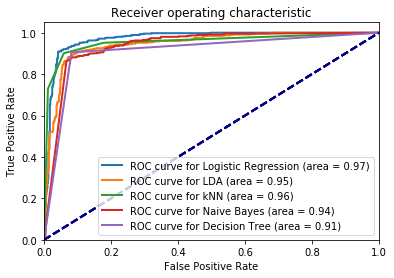

In [27]:
import matplotlib.pyplot as plt

def ROC(classifiers,X_train,y_train,X_test,y_test):
    for classifier in classifiers:
        if classifier == "Logistic Regression":
            model = log_reg(X_train,y_train)
        elif classifier == "kNN":
            model = knn(X_train, y_train)
        elif classifier == "LDA" :
            model = LDA(X_train, y_train)
        elif classifier == "Naive Bayes":
            model = NB(X_train, y_train)
        elif classifier == "Decision Tree":
            model = DTClassifier(X_train, y_train)

        #y_pred_test = model.predict(X_test)
        y_pred_test = model.predict_proba(X_test)[:,1]
        #print(y_pred_test)
        fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
        #print(fpr,tpr,thresholds)
    #     plot_ROC(fpr,tpr,classifier)

    # def plot_ROC(false_positive_rate,true_positive_rate,classifier): (area = %0.2f) % auc(fpr,tpr)
        lw=2
        plt.plot(fpr,tpr, lw=lw,
                 label='ROC curve for %s (area = %0.2f)' % (classifier,auc(fpr,tpr)) )
        plt.plot([0, 1], [0, 1], lw=lw, color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        title = 'Receiver operating characteristic'
        plt.title(title)
        plt.legend(loc="lower right")
        #plt.show()
        print("AUC for",classifier,":",auc(fpr,tpr))
    plt.show()    
    
#for i in classifiers:
ROC(classifiers,X_train,y_train,X_test,y_test)
    

\pagebreak

# Problem 3

## 3a

In [28]:

X = org_data.iloc[:,0:-1]
y = org_data[['class']]
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 100, train_size = 100, stratify=y, random_state = 57)


In [29]:
# preprocessing
ss_scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(ss_scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(ss_scaler.transform(X_test),columns = X_test.columns)

In [30]:
#a
def euclidean_distance(X,Y):
    temp = np.transpose(X-Y).dot(X-Y)
    distance = np.sqrt(temp)
    return distance
    

## 3b

In [31]:
#b

def test_kNN(k,train_feature,train_class,test_point):
    distance_list = []
    nearest_points = []
    pred_class_dict = {}
    
    for i, sample in enumerate(train_feature.values):
        distance_list.append([euclidean_distance(sample,test_point.values)])
        distance_list[i].append(i)
        
    k_nearest_distances = sorted(distance_list,key=key_func)[0:k]
    
    for i in k_nearest_distances:
        nearest_points.append(i[1])
    
    for point in nearest_points:
        class_val = train_class.iloc[point][0]
        if class_val not in pred_class_dict:
            pred_class_dict[class_val] = 1
        else:
            pred_class_dict[class_val] += 1
    #print(pred_class_dict)
    pred_class = max(pred_class_dict, key=pred_class_dict.get)
    return(pred_class)      

    
def key_func(s):
    return s[0]

print(test_kNN(5, X_train, y_train, X_test.iloc[0]))


1


\pagebreak

## 3c

In [32]:
# c
# Using my own implementation
import time

n_row = X_test.shape[0]
for k in range(1,17,2):
    y_pred_kNN = []
    start_time = time.time()
    for row in range(n_row):
        y_pred_kNN.append(test_kNN(k, X_train, y_train, X_test.iloc[row]))
    print("Running time of kNN testing averaged over all the points in the testing set for k=%d is %s seconds " 
          % (k,((time.time() - start_time)/n_row)))
    #print(y_pred_kNN)    
    print("Accuracy in testing data using KNN for k=",k,": ",metrics.accuracy_score(y_test,y_pred_kNN))
    print("Error in testing data using KNN for k=",k,": ",1-metrics.accuracy_score(y_test, y_pred_kNN))
    print("\n")
    

Running time of kNN testing averaged over all the points in the testing set for k=1 is 0.0032459044456481932 seconds 
Accuracy in testing data using KNN for k= 1 :  0.77
Error in testing data using KNN for k= 1 :  0.22999999999999998


Running time of kNN testing averaged over all the points in the testing set for k=3 is 0.003396103382110596 seconds 
Accuracy in testing data using KNN for k= 3 :  0.88
Error in testing data using KNN for k= 3 :  0.12


Running time of kNN testing averaged over all the points in the testing set for k=5 is 0.005052683353424073 seconds 
Accuracy in testing data using KNN for k= 5 :  0.87
Error in testing data using KNN for k= 5 :  0.13


Running time of kNN testing averaged over all the points in the testing set for k=7 is 0.00550652027130127 seconds 
Accuracy in testing data using KNN for k= 7 :  0.89
Error in testing data using KNN for k= 7 :  0.10999999999999999


Running time of kNN testing averaged over all the points in the testing set for k=9 is 0.0

\pagebreak

## 3d

In [33]:
# d
#Using existing package
y_train = np.ravel(y_train)
for k in range(1,17,2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    #predictions 
    #y_pred_train_knn = classifier.predict(X_train)
    y_pred_test_knn = classifier.predict(X_test)
    #print("Accuracy in training data using KNN for k=",i,": ",metrics.accuracy_score(y_train, y_pred_train_knn))
    #print("Error in training data using KNN for k=",i,": ",1-metrics.accuracy_score(y_train, y_pred_train_knn))
    print("Accuracy in testing data using KNN for k=",k,": ",metrics.accuracy_score(y_test, y_pred_test_knn))
    print("Error in testing data using KNN for k=",k,": ",1-metrics.accuracy_score(y_test, y_pred_test_knn))
    print("\n")

Accuracy in testing data using KNN for k= 1 :  0.77
Error in testing data using KNN for k= 1 :  0.22999999999999998


Accuracy in testing data using KNN for k= 3 :  0.88
Error in testing data using KNN for k= 3 :  0.12


Accuracy in testing data using KNN for k= 5 :  0.87
Error in testing data using KNN for k= 5 :  0.13


Accuracy in testing data using KNN for k= 7 :  0.89
Error in testing data using KNN for k= 7 :  0.10999999999999999


Accuracy in testing data using KNN for k= 9 :  0.86
Error in testing data using KNN for k= 9 :  0.14


Accuracy in testing data using KNN for k= 11 :  0.82
Error in testing data using KNN for k= 11 :  0.18000000000000005


Accuracy in testing data using KNN for k= 13 :  0.86
Error in testing data using KNN for k= 13 :  0.14


Accuracy in testing data using KNN for k= 15 :  0.9
Error in testing data using KNN for k= 15 :  0.09999999999999998




The result obtained using my own implementation of kNN is similar to those obtained using the package for different values of k. The accuracy increase till k=7, post which the accuracy decreases on increasing k.

## 3e

The running time of kNN testing averaged over all the points in the testing set is printed along with problem 3c.


\pagebreak

# Problem 4

## 4a,b

In [34]:
data = org_data.copy()


In [35]:
def k_fold_CV(data,k_fold,classifier):
    N = data.shape[0]
    fold_size = int(N/k_fold)
    start = 0
    end = fold_size
    error = 0
    for k in range(k_fold):
#         print("start",start)
#         print("end",end)
        test = data[start:end]
        if start != 0:
            train = data[0:start]
            train = train.append(data[end:N],ignore_index = True)
        else:    
            train = data[end:N]
#         print("test shape",test.shape)
#         print("train shape",train.shape)
#         print("\n")
        X_train, X_test, y_train, y_test = preprocessing_data(train,test)
#         print("y_train shape",y_train.shape)
#         print("y_test shape", y_test.shape)
        if classifier == "LDA":
            model = LDA(X_train,y_train)
        elif classifier == "Logistic Regression":
            model = Log_Reg(X_train, y_train)
        y_pred = model.predict(X_test)
#         print("Error in testing set using",model,"for fold",k,":",1 - metrics.accuracy_score(y_test, y_pred))
        error += 1 - metrics.accuracy_score(y_test, y_pred)
        
        start = start + fold_size
        if end + fold_size > N:
            end = N
        else:
            end = end + fold_size
    print("Average validation error using",classifier,"for number of folds =",k_fold,":", error/k_fold)    
    return (error/k_fold)
   
    
def LDA(X,y):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X,y)
    return lda

def Log_Reg(X,y):
    log_reg = LogisticRegression()
    log_reg.fit(X,y)
    return log_reg

def preprocessing_data(train,test):
    X_train = train.iloc[:,0:-1]
    y_train = train["class"]
    X_test = test.iloc[:,0:-1]
    y_test = test["class"]
    ss_scaler = preprocessing.StandardScaler()
    X_train = pd.DataFrame(ss_scaler.fit_transform(X_train),columns=X_train.columns)
    X_test = pd.DataFrame(ss_scaler.transform(X_test),columns = X_test.columns) 
    return X_train, X_test, y_train, y_test

    
#k_fold_CV(data,5,"LDA") 
classifiers = ["Logistic Regression", "LDA"]
for model in classifiers:
    for k in [5,10]:
        k_fold_CV(data,k,model)
    

Average validation error using Logistic Regression for number of folds = 5 : 0.1408695652173913
Average validation error using Logistic Regression for number of folds = 10 : 0.10934782608695652
Average validation error using LDA for number of folds = 5 : 0.18391304347826087
Average validation error using LDA for number of folds = 10 : 0.14804347826086955


## 4c

From the above run, we can say that the Logistic Regression works better than LDA as the average validation error for k=5 using logistic regression is 0.140 and using LDA is 0.183. And the trend is similar for k = 10, however the average validation error decreases as the value of k increases from 5 to 10 for both the classifiers.

\pagebreak

# Problem 6

## 6a

In [36]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

theta = np.matrix('-6;0.05;1')

X = np.matrix('1;40;3.5')

temp = np.transpose(theta).dot(X)

prob = sigmoid(temp)

print("Recieve A in Class with probability:", prob.A1[0])



Recieve A in Class with probability: 0.3775406687981454
